In [45]:
%load_ext autoreload
%autoreload 2
from Network import Network
from FrankWolf import *
from EntropyMaximisation import *

import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## SiouxFalls

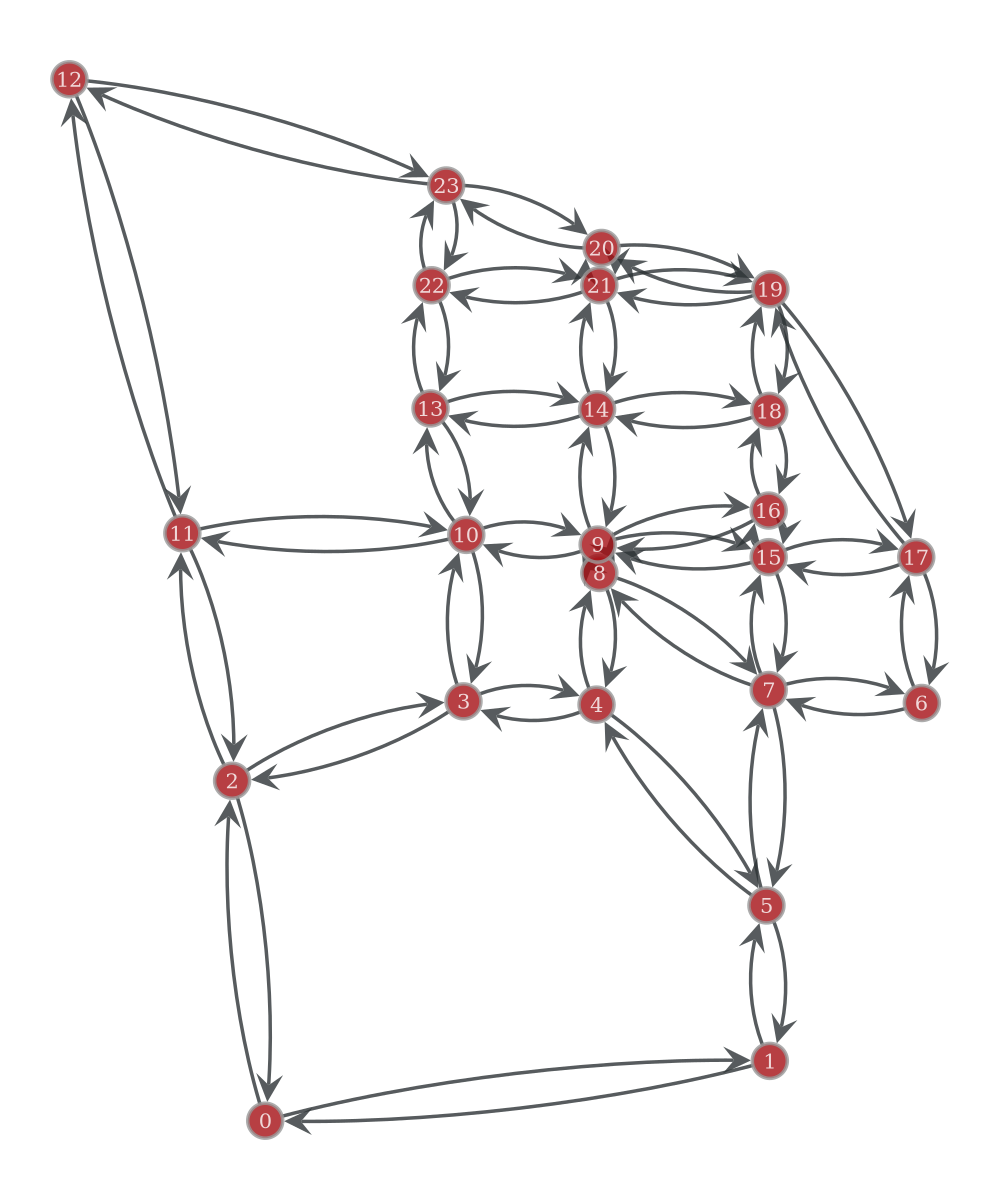

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb58e1075c0, at 0x7fb586654560>

In [21]:
net = Network("SiouxFalls")
net.draw()

In [ ]:
# Run the frankwolf algorith and save the results
frankwolf_by_origin, frankwolf_flows = frankwolf(net, net.trips, verbose=1, tolerance= 1e-6, n_max=2e5)
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

"""
Performance :

1e-4 in ~1 min
1e-5 in ~10 min
1e-6 in ~1h30
1e-7 in > 3h
"""

0it [00:00, ?it/s]

FileNotFoundError: [Errno 2] No such file or directory: 'files/SiouxFalls_2D_FrankWolf_by_origin'

In [ ]:
# Save the results
net.save_flow(frankwolf_by_origin, "FrankWolf_by_origin")
net.save_flow(frankwolf_flows, "UE")

In [16]:
frankwolf_by_origin, UE_flows = net.load_flow("FrankWolf_by_origin"), net.load_flow("UE")

In [65]:
# Compare the results with the ones availlable online
computed_flows = pd.DataFrame(net.get_edges([UE_flows]), columns=["From", "To", "FrankWolf"])
computed_flows[["From", "To"]] += 1
computed_flows = computed_flows.set_index(["From", "To"])
net.TNTP_flows.columns = net.TNTP_flows.columns.str.rstrip()
df = net.TNTP_flows.set_index(["From", "To"]).join(computed_flows, how="outer")
df["Diff"] = df["Volume"] - df["FrankWolf"]
df.sample(5)

,,Volume,Cost,FrankWolf,Diff
From,To,,,,
24,21,10259.524716,11.752579,10259.488584,0.036133
18,7,15854.621456,2.063186,15854.682547,-0.061090
3,4,14006.371020,4.269402,14006.521938,-0.150918
17,19,9953.021432,7.436627,9953.017884,0.003548
23,14,8394.900178,9.065967,8394.871363,0.028815


In [17]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

0it [00:00, ?it/s]

1: X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X.X:   0%|          | 0/24 [00:00<?, ?it/s]

/home/ars/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


2:  . .X.X.X.X. . . .X.X.X.X. .X.X.X. . .X. .X.X.X:   0%|          | 0/24 [00:00<?, ?it/s]

3:  . .X. . . . .X.X.X.X.X. . .X.X.X. .X.X. . .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

4:  .X.X.X. . . .X. .X.X.X.X.X. .X.X. . . .X.X. . :   0%|          | 0/24 [00:00<?, ?it/s]

5:  . .X.X.X. .X.X. .X. .X. .X.X.X.X. . . .X. .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

6:  . .X.X. .X. .X. .X. .X. . .X.X.X. . . .X. . . :   0%|          | 0/24 [00:00<?, ?it/s]

7:  . .X.X.X. . .X. .X. .X. . . .X.X. . . . . . .X:   0%|          | 0/24 [00:00<?, ?it/s]

8:  . .X.X. . . .X. .X. .X.X. .X.X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

9:  . .X.X. .X. .X. .X.X.X. . .X.X.X. .X. .X.X. . :   0%|          | 0/24 [00:00<?, ?it/s]

10:  . .X.X.X.X.X.X. .X.X.X. . . .X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

11:  . .X.X. . . .X. .X. .X. . . .X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

12:  . .X.X.X.X. .X. .X. .X.X. .X.X.X. . . . . . . :   0%|          | 0/24 [00:00<?, ?it/s]

13:  . .X.X. .X. .X. .X. .X. . .X.X.X. . . . . .X.X:   0%|          | 0/24 [00:00<?, ?it/s]

14:  . .X.X.X. . .X. .X.X.X.X. . .X.X. . . .X. . . :   0%|          | 0/24 [00:00<?, ?it/s]

15:  . .X.X. . .X.X. .X.X.X. . . .X.X. . .X. .X. . :   0%|          | 0/24 [00:00<?, ?it/s]

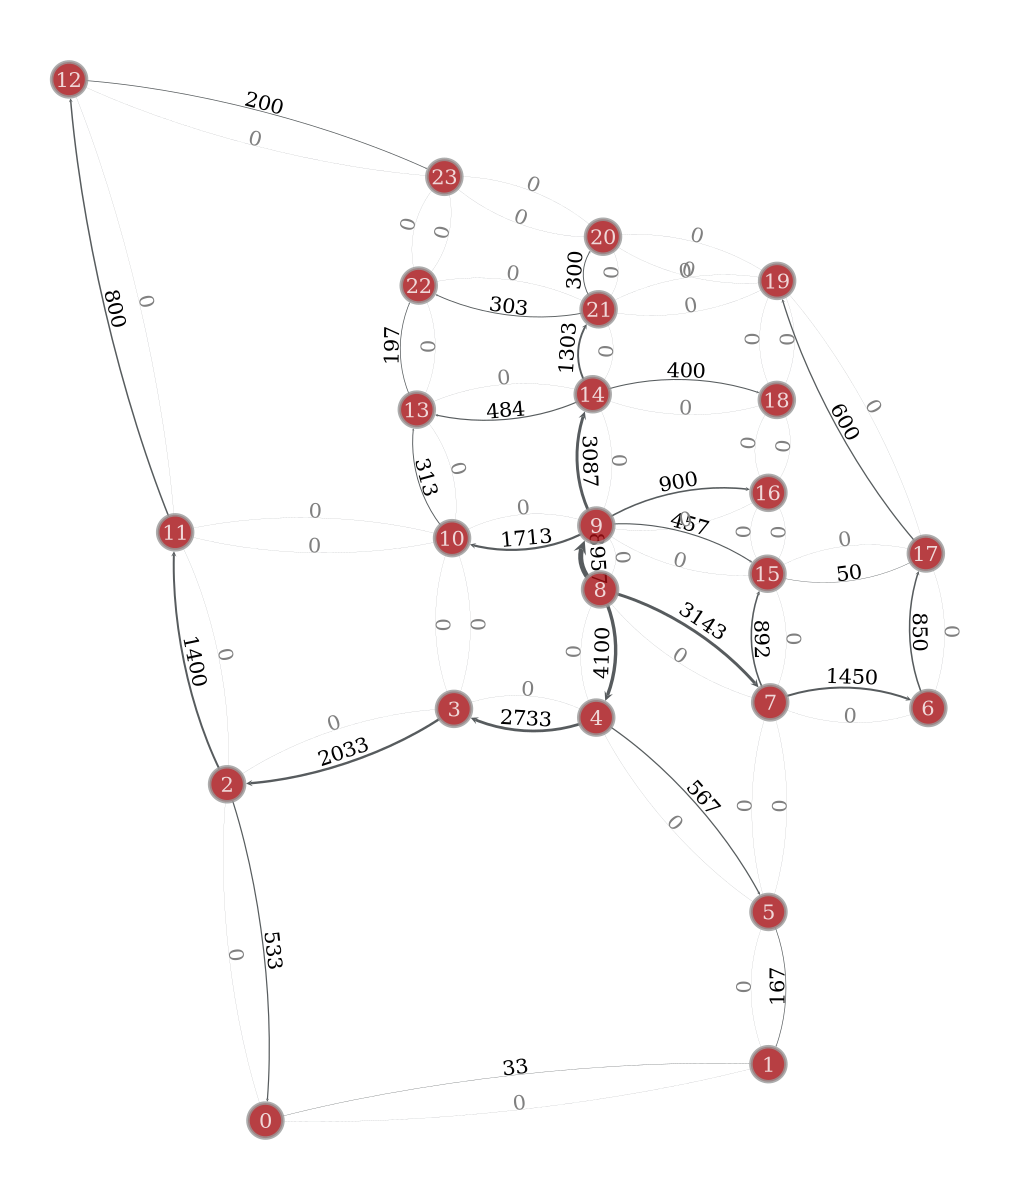

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb58e1075c0, at 0x7fb5866db920>

In [ ]:
EMARB_flows = net.load_flow("EMARB_result")
EMARB_flows.get_2d_array()

net.draw(flows_by_o = EMARB_flows, o=8)

In [64]:
flows, log_entropy = get_OD_paths_flows(net, net.trips, flows_by_origin=EMARB_flows, flow_limit=0)
log_entropy

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/528 [00:00<?, ?it/s]

59252.424172225496

## Example

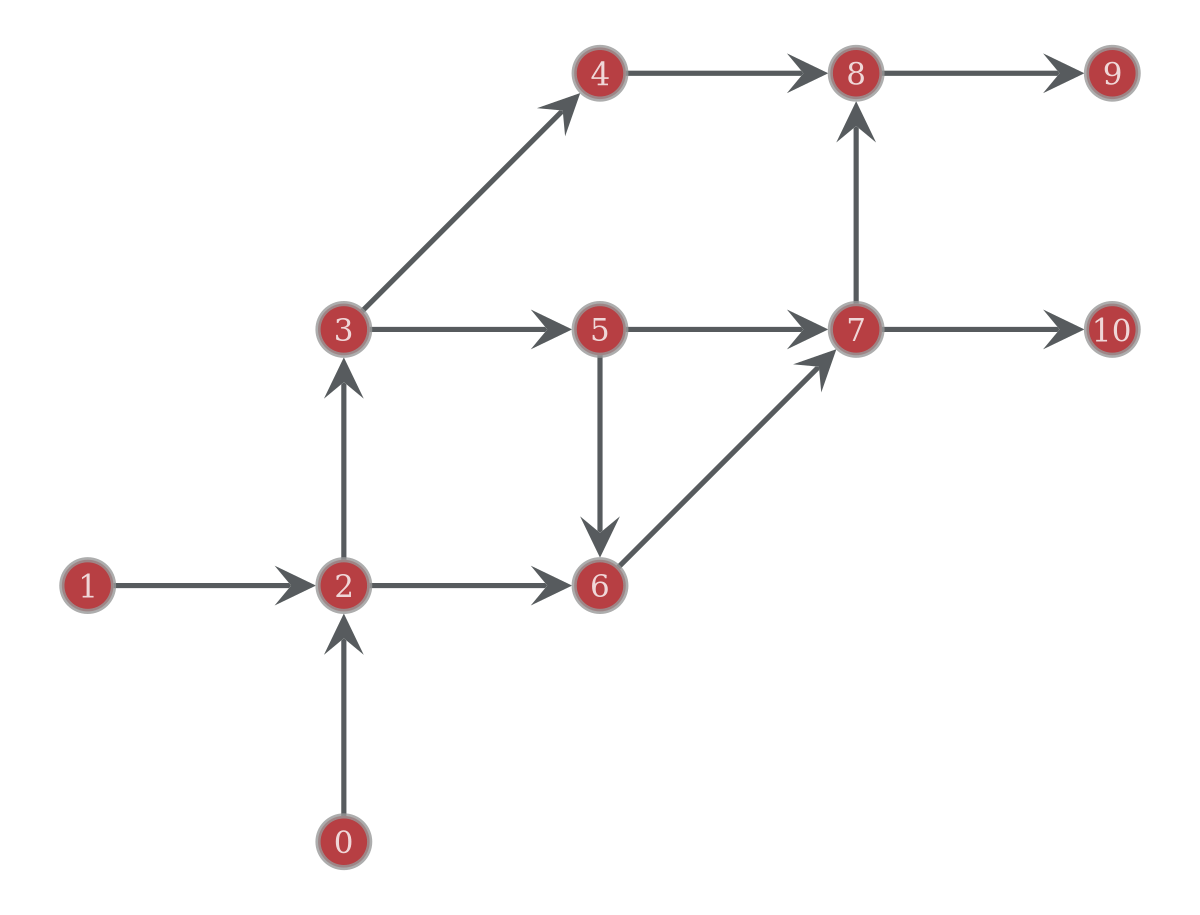

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb52007ecf0>

In [81]:
net = Network("Example")
net.draw()

In [82]:
OD = np.zeros((net.num_vertices(), net.num_vertices()))
OD[0,9] = 200
OD[0, 10] = 160
OD[1, 9] = 80
OD[1, 10] = 40
OD

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 200., 160.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  80.,  40.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

In [90]:
edges_indices = net.get_edges([net.edge_index])
edges_indices[:, :2] +=1
edges_indices

array([[ 1,  3,  0],
       [ 2,  3,  1],
       [ 3,  4,  2],
       [ 3,  7,  3],
       [ 4,  5,  4],
       [ 4,  6,  5],
       [ 5,  9,  6],
       [ 6,  7,  7],
       [ 6,  8,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 8, 11, 11],
       [ 9, 10, 12]])

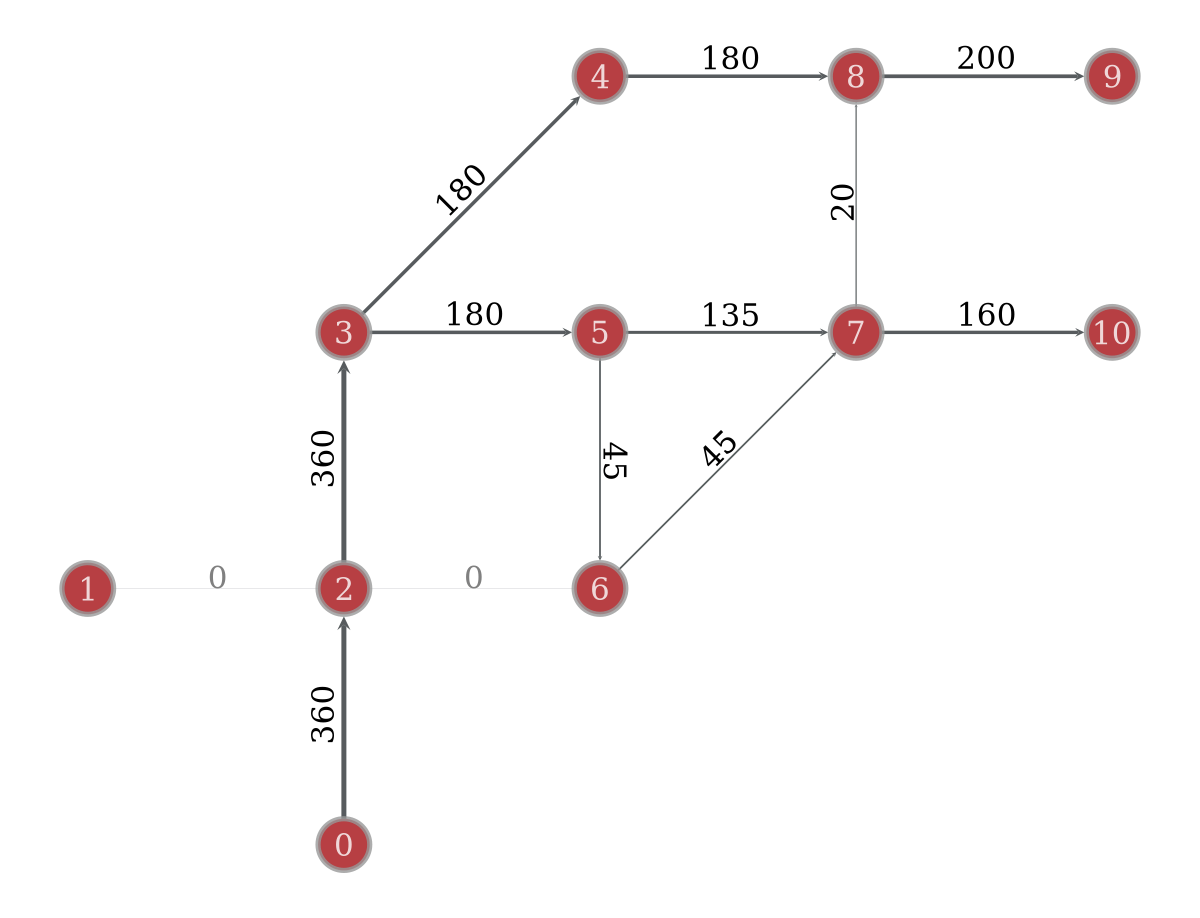

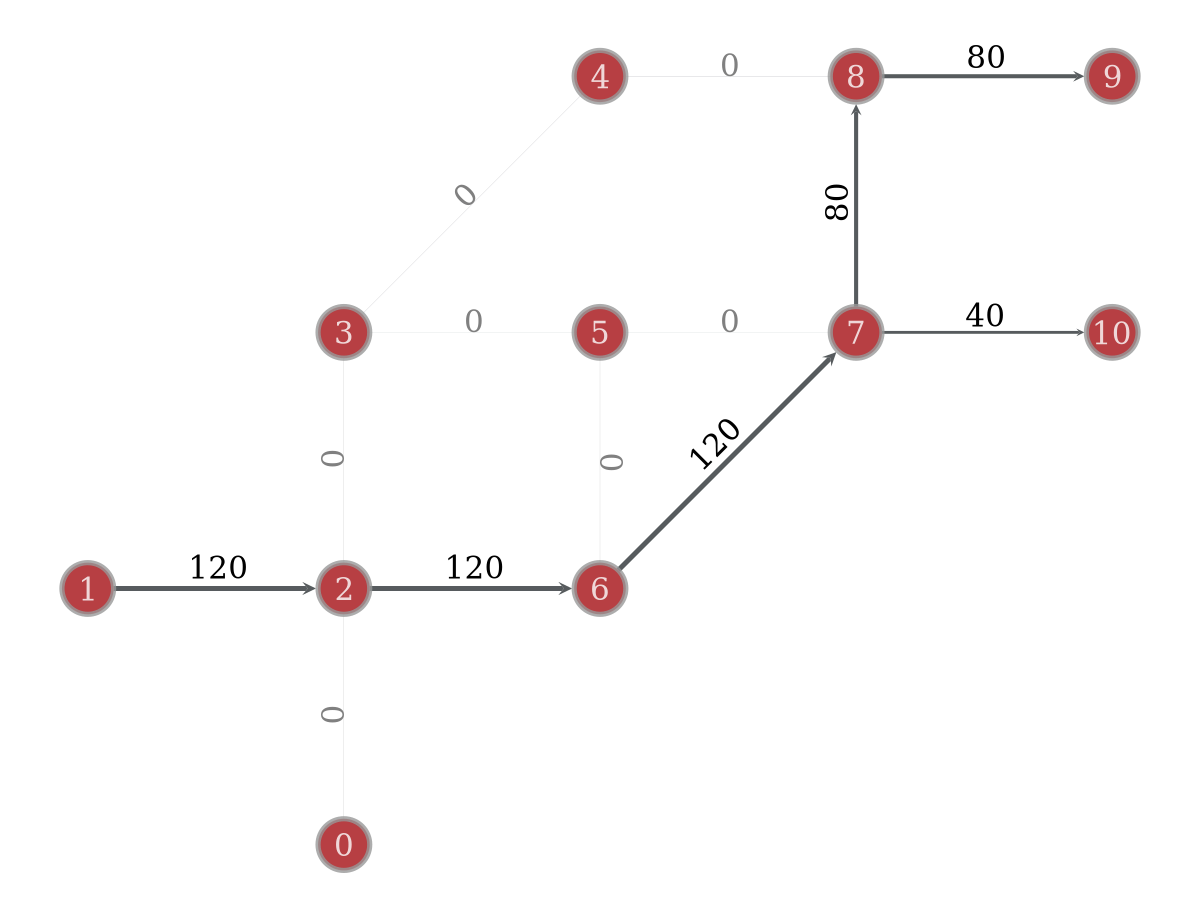

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb585c3f320>

In [92]:
flows_by_o = net.new_edge_property("vector<float>", vals=np.zeros((net.num_edges(), net.num_vertices())))
a = flows_by_o.get_2d_array()
a[0] = [360, 0, 360, 0, 180, 180, 180, 45, 135, 45, 20, 160, 200]
a[1] = [0, 120, 0, 120, 0, 0, 0, 0, 0, 120, 80, 40, 80]
flows_by_o.set_2d_array(a)
net.draw(flows_by_o=flows_by_o, o=0)
net.draw(flows_by_o=flows_by_o, o=1)

In [ ]:
flows_by_o = EMARB(net, frankwolf_by_origin, 1)
net.save_flow(flows_by_o, "EMARB_result")

In [94]:
x_n, residuals = backward_entropy_maximisation(net, flows_by_o, 7)
new_flows = forward_entropy_maximization(net, x_n, residuals, 8)

/home/ars/Braess-Links-Identification/EntropyMaximisation.py:32: RuntimeWarning: invalid value encountered in divide
  psi_r_ij[:, in_edge_indices] = np.where(eta_rj[:,[j]] > 0, x_a[:, in_edge_indices]/eta_rj[:,[j]], 0)


'Graph E'

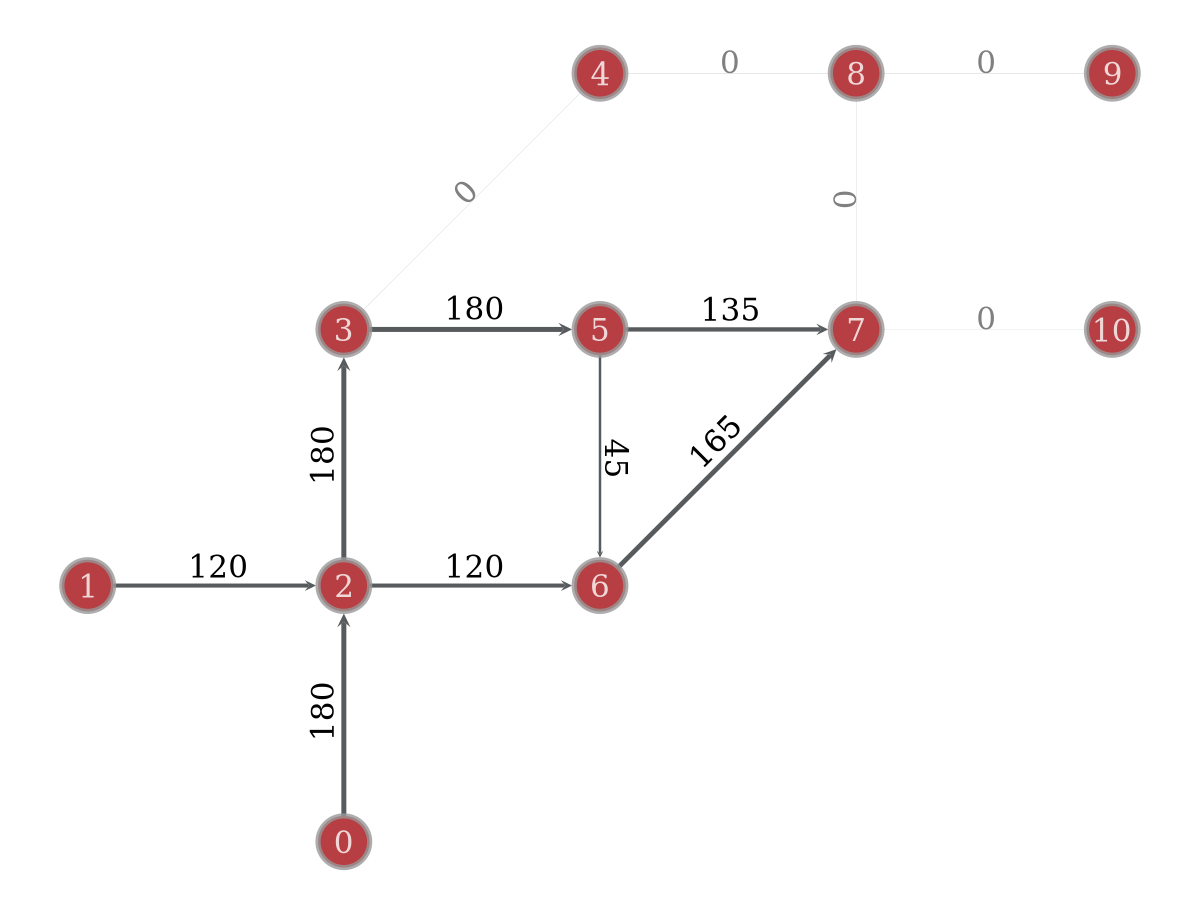

'Graph F'

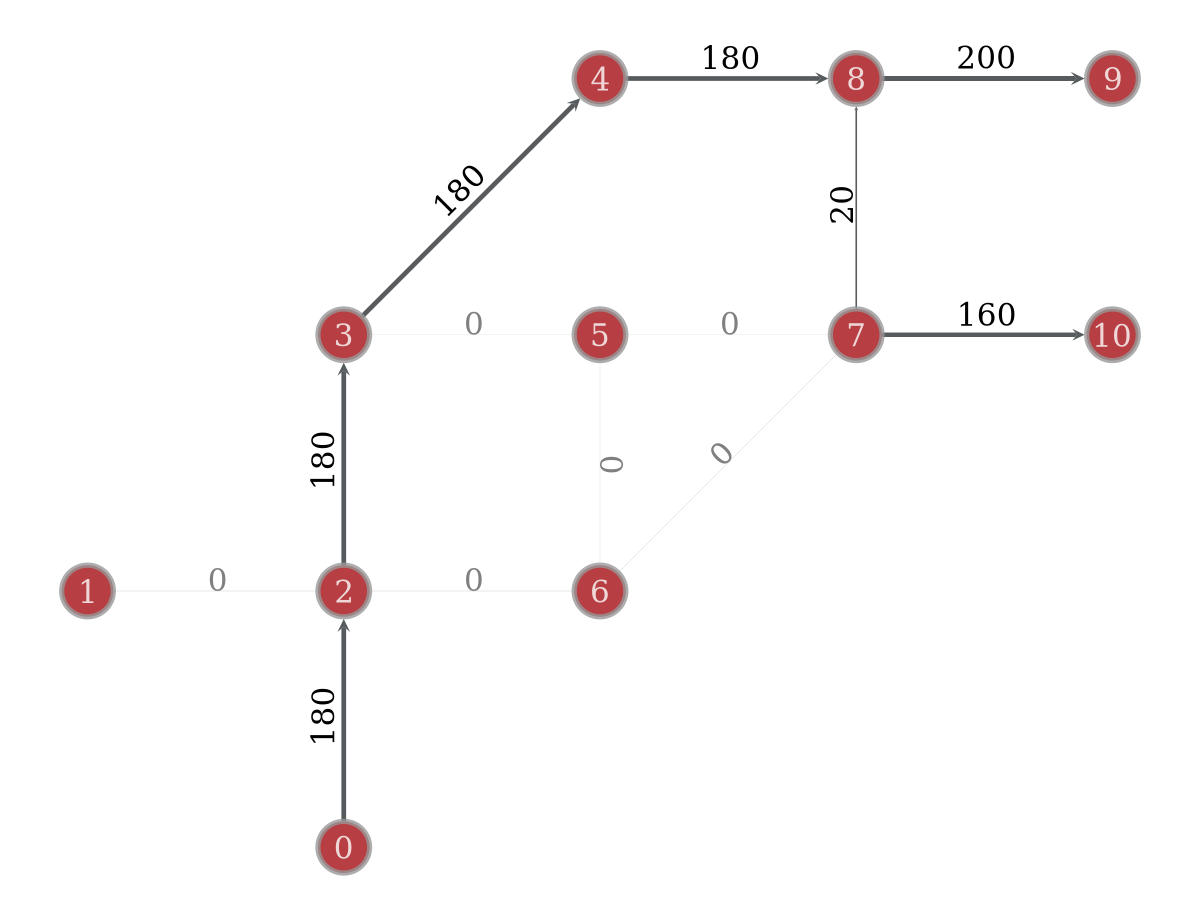

'Graph G'

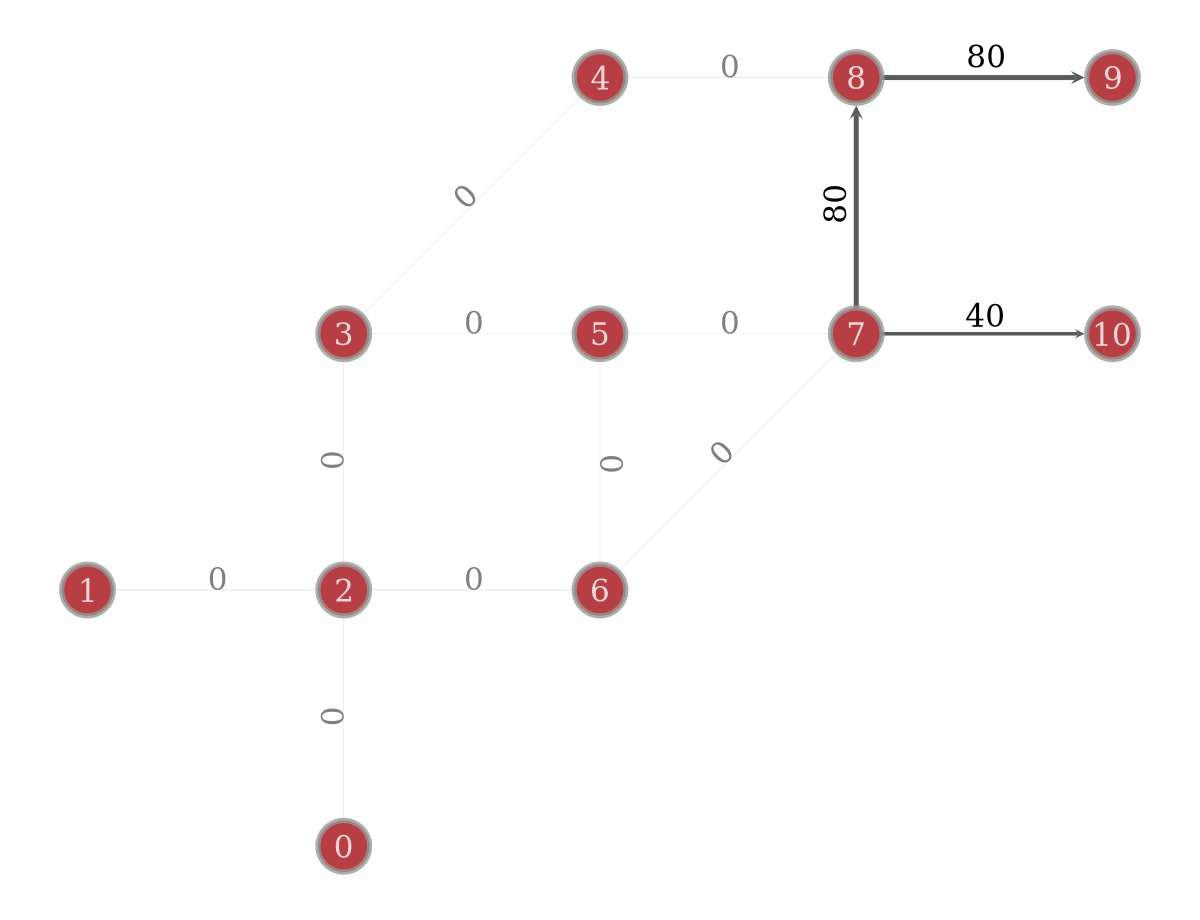

'Graph K'

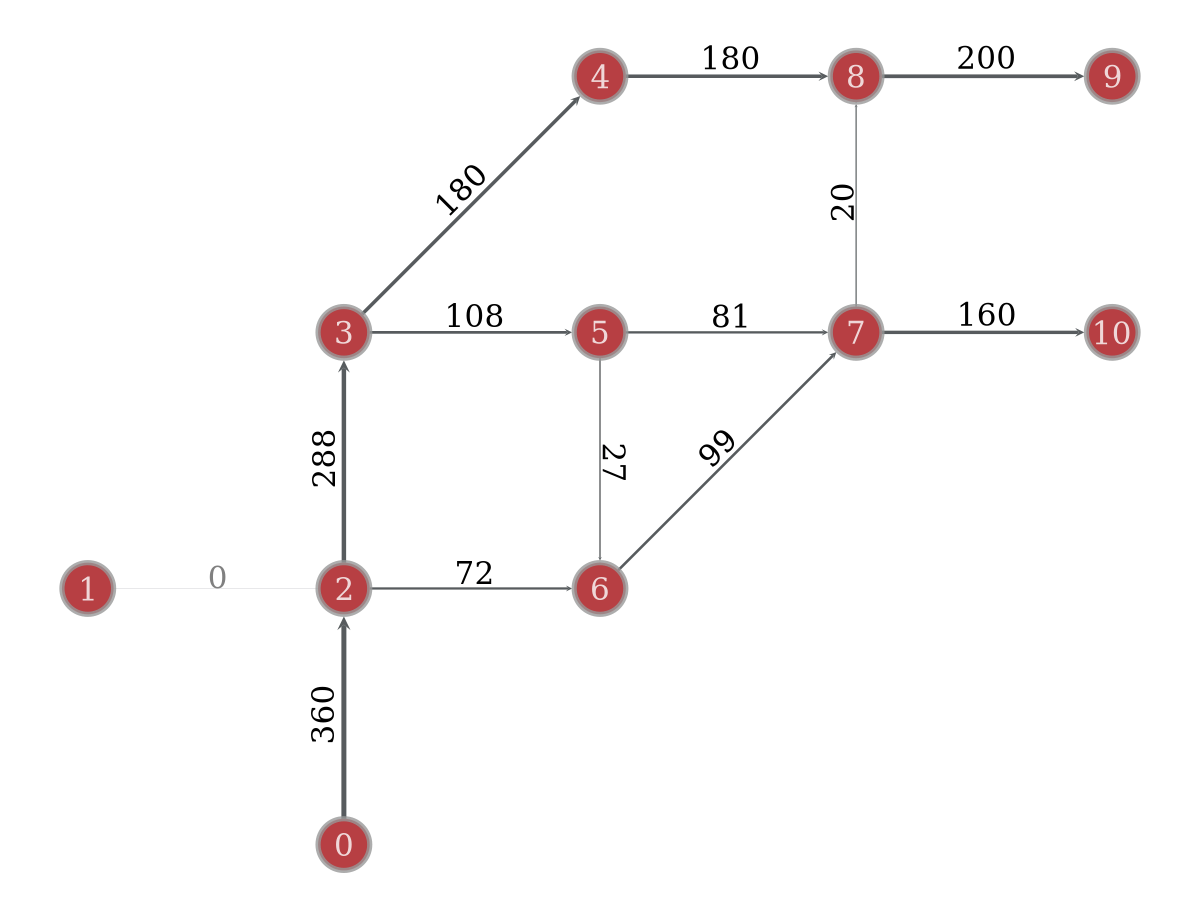

'Graph L'

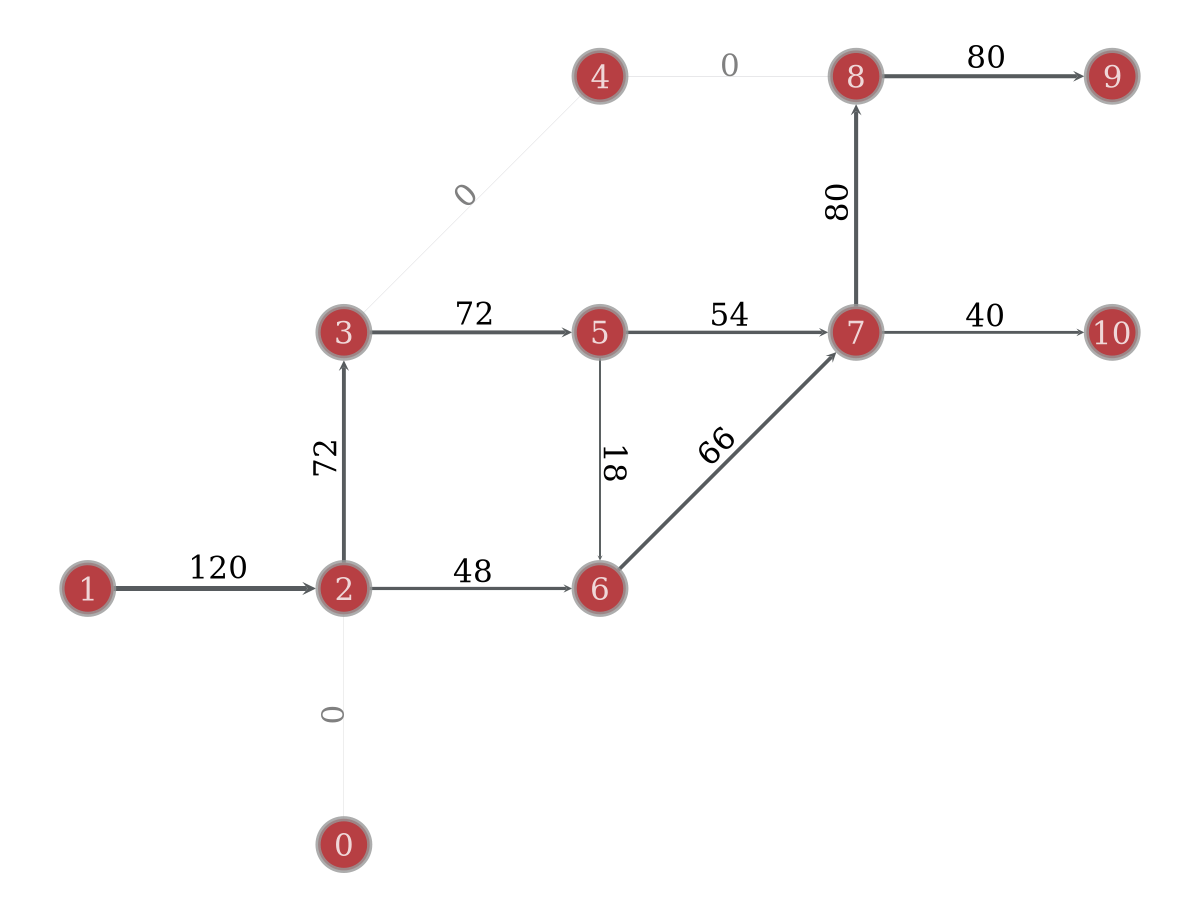

'Figure 1'

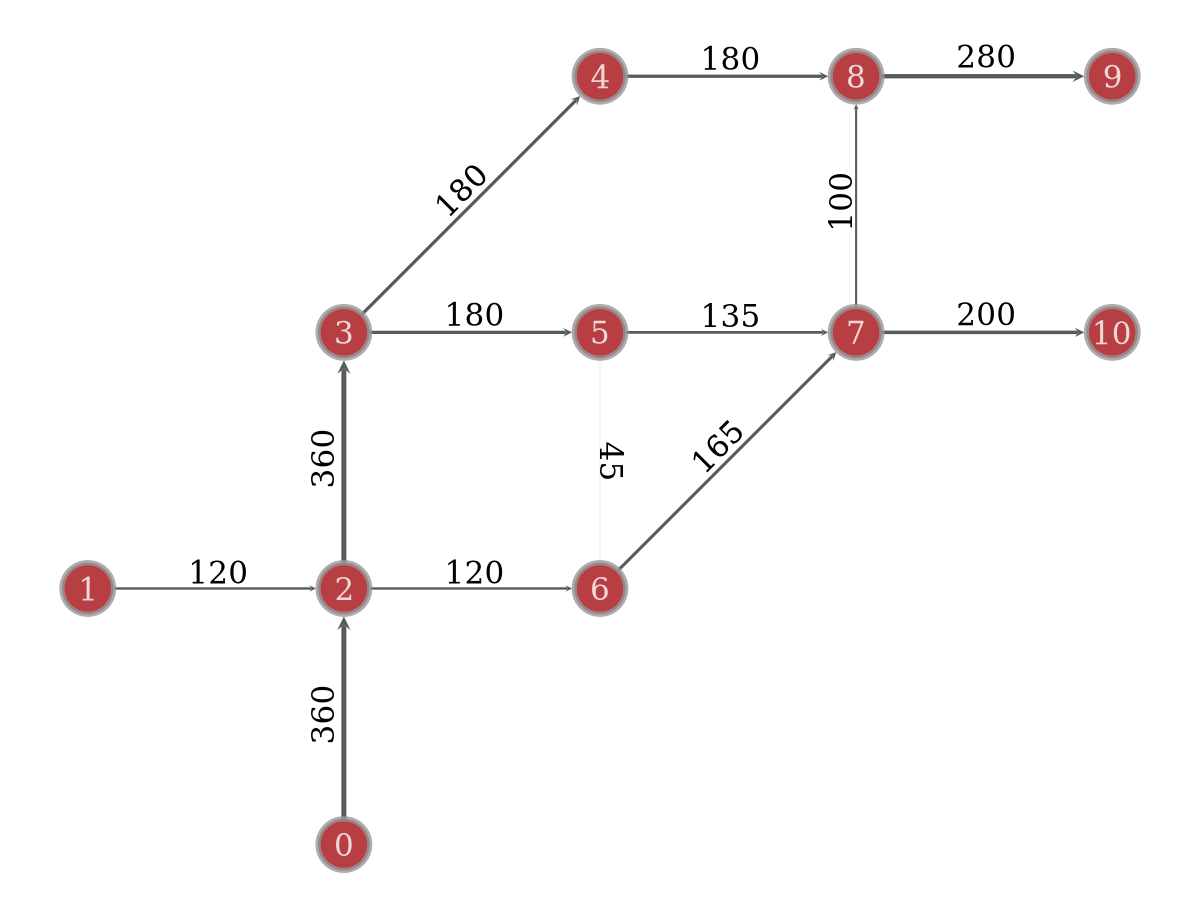

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fb504bf7530, at 0x7fb547310650>

In [99]:
display("Graph E")
net.draw(flows=x_n)
display("Graph F")
net.draw(flows_by_o=residuals, o=0)
display("Graph G")
net.draw(flows_by_o=residuals, o=1)
display("Graph K")
net.draw(flows_by_o=new_flows, o=0)
display("Graph L")
net.draw(flows_by_o=new_flows, o=1)
display("Figure 1")
net.draw(flows_by_o=new_flows, o="sum")